이 코드는 모델의 전체 성능 평가를 확인하기 위한 코드가 아님.
- dataset의 모든 샘플에 대해 이 과정을 반복하고, 평균 값을 계산해야 전반적인 요약 성능을 파악할 수 있음.

In [1]:
pip install korouge_score

Note: you may need to restart the kernel to use updated packages.


In [2]:
from rouge import Rouge
from korouge_score import rouge_scorer

In [3]:
summary_model_Original = "블록체인은 물류, 핀테크, 의료, 공공 등 다양한 분야에서 연구되고 있으며 공공정보 소프트웨어 사업에서 개발 산출물과 프로젝트 관리 방법론에서 요청하는 산출물이 일치하지 않아 산출물이 누락되는 경우가 발생하고 대금을 지급하기 위해 별도의 프로세스가 필요하다."
                          
summary_model_finetuned = "이더리움 블록체인을 사용하여 분산 환경을 구성하고 모든 산출물이 승인되었을 경우 자동으로 대금이 지급되게 공공정보 소프트웨어 사업산출물 관리 시스템을 제안한다. 이를 통해 시스템 장애가 발생해도 정상 서비스를 제공하고, 산출물 관리의 투명성과 추적성을 제공하며, 자동화된 대금 지급으로 발주사와 수행사 간 갈등을 줄이고자 한다. 본 시스템에서 산줄물의 정보는 블록체인에 저장하고, 산출물은 버전 정보와 이전 산출물 파일의 해시값까지 활용하여 계산된 해시값을 파일명으로 SFTP 서버에 저장한다. 실험을 통해 수행사에서 등록한 산출물의 해시값이 정확한지 확인하고, SFTP 서버에 저장된 산출물의 파일명이 이더리움 블록체인에 등록된 해시값과 같은지 확인하였으며, 모든 산출물이 승인되었을 때 수행사의 이더리움 주소로 대금이 자동 송금되는 것을 확인하였다."

summary_label = "이더리움 블록체인 기반의 공공정보 소프트웨어 사업산출물 관리 시스템을 본 논문에서 제안한다. 이 시스템은 분산 환경을 구성하여 시스템 장애에도 서비스를 지속하며, 산출물 승인 시 자동 대금 지급을 통해 발주사와 수행사 간의 갈등을 줄이는 방안을 제시한다. 산출물 정보는 블록체인에 저장되며, 버전 정보 및 이전 산출물 파일의 해시값을 활용하여 해시값을 파일명으로 SFTP 서버에 저장한다."

In [4]:
scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL", "rougeLsum"])

In [5]:
scores_Original = scorer.score(summary_label, summary_model_Original)
scores_finetuned = scorer.score(summary_label, summary_model_finetuned)

In [6]:
print("Fine-tuning 전 요약 모델 성능(Rouge Scores) : ", scores_Original)
print('\n')
print("Fine-tuning 후 요약 모델 성능(Rouge Scores) : ", scores_finetuned)

Fine-tuning 전 요약 모델 성능(Rouge Scores) :  {'rouge1': Score(precision=0.09375, recall=0.058823529411764705, fmeasure=0.07228915662650601), 'rouge2': Score(precision=0.03225806451612903, recall=0.02, fmeasure=0.024691358024691357), 'rougeL': Score(precision=0.09375, recall=0.058823529411764705, fmeasure=0.07228915662650601), 'rougeLsum': Score(precision=0.09375, recall=0.058823529411764705, fmeasure=0.07228915662650601)}


Fine-tuning 후 요약 모델 성능(Rouge Scores) :  {'rouge1': Score(precision=0.33695652173913043, recall=0.6078431372549019, fmeasure=0.43356643356643354), 'rouge2': Score(precision=0.14285714285714285, recall=0.26, fmeasure=0.1843971631205674), 'rougeL': Score(precision=0.2826086956521739, recall=0.5098039215686274, fmeasure=0.3636363636363636), 'rougeLsum': Score(precision=0.2826086956521739, recall=0.5098039215686274, fmeasure=0.3636363636363636)}


In [8]:
import matplotlib.pyplot as plt
import numpy as np

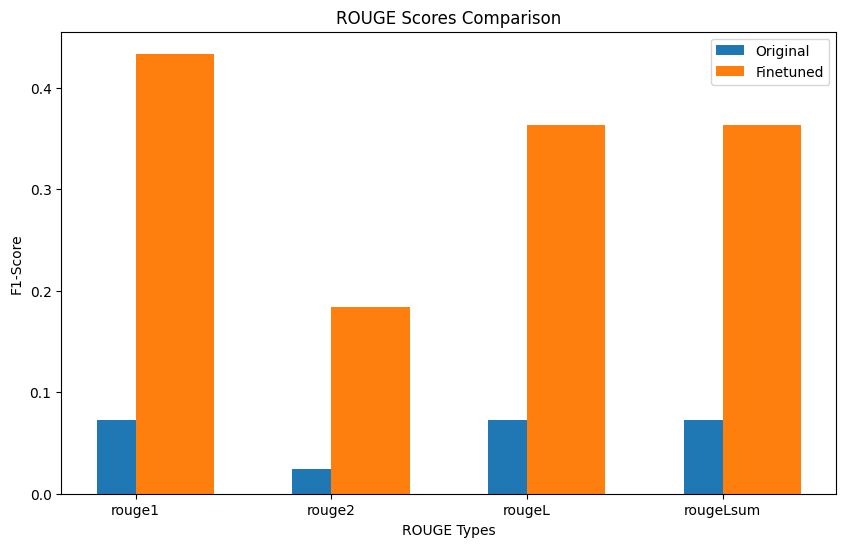

In [9]:
# ROUGE 지표별로 F1-score 추출
rouge_types = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
original_f1_scores = [scores_Original[rouge].fmeasure for rouge in rouge_types]
finetuned_f1_scores = [scores_finetuned[rouge].fmeasure for rouge in rouge_types]

# X 축 위치 설정
x = range(len(rouge_types))

# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(x, original_f1_scores, width=0.4, label='Original', align='center')
plt.bar(x, finetuned_f1_scores, width=0.4, label='Finetuned', align='edge')

# 축 이름 및 타이틀 설정
plt.xlabel('ROUGE Types')
plt.ylabel('F1-Score')
plt.title('ROUGE Scores Comparison')
plt.xticks(x, rouge_types)  # X 축에 ROUGE 타입 이름 설정

# 레전드 표시
plt.legend()

# 그래프 보여주기
plt.show()


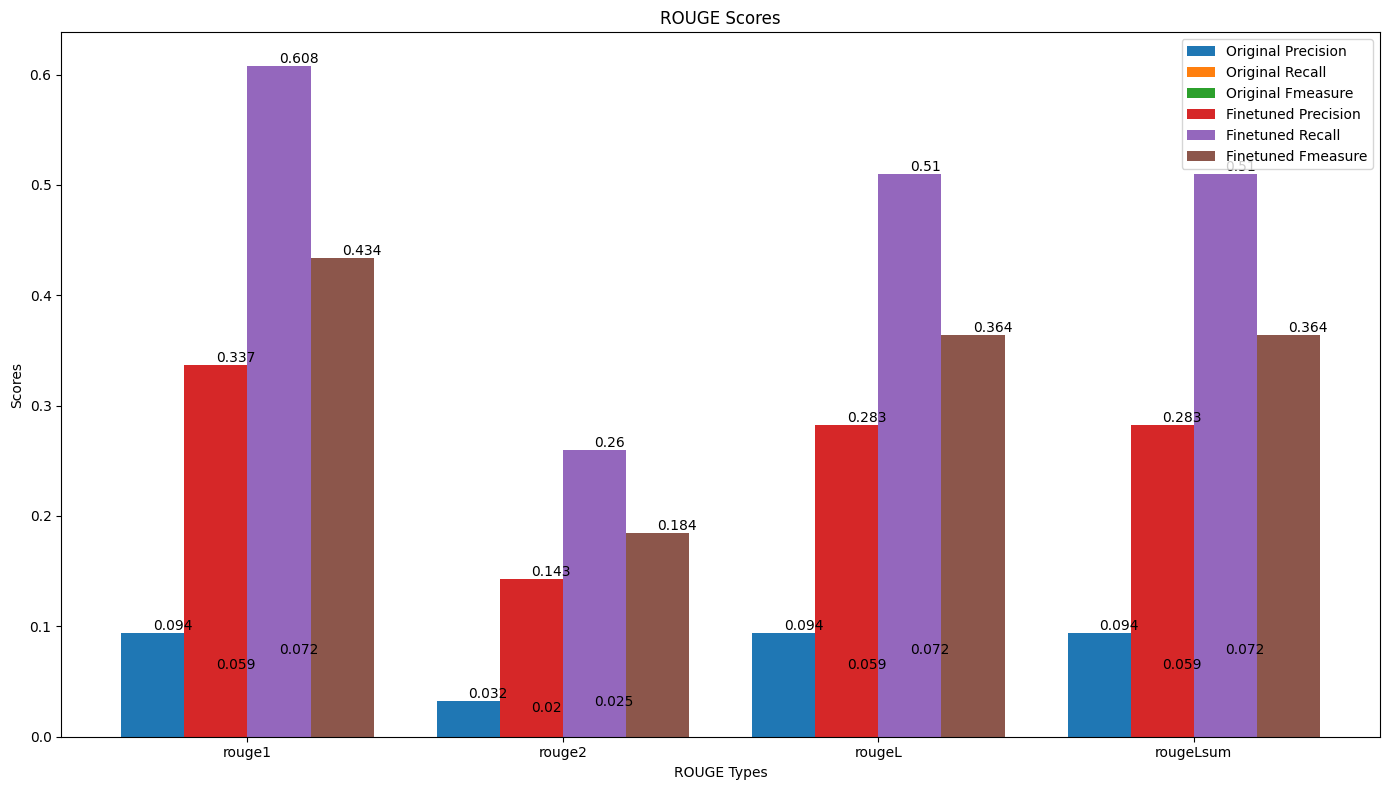

In [10]:
# ROUGE 지표별로 Precision, Recall, F1-score 추출
rouge_types = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
metrics = ['precision', 'recall', 'fmeasure']

# 데이터 준비
data_original = [[scores_Original[rouge].precision, scores_Original[rouge].recall, scores_Original[rouge].fmeasure] for rouge in rouge_types]
data_finetuned = [[scores_finetuned[rouge].precision, scores_finetuned[rouge].recall, scores_finetuned[rouge].fmeasure] for rouge in rouge_types]

# NumPy 배열로 변환
data_original = np.array(data_original)
data_finetuned = np.array(data_finetuned)

# X 축 위치 설정
x = np.arange(len(rouge_types))  # ROUGE 타입 개수만큼 x 축 위치 설정
width = 0.2  # 막대 너비 설정

# 그래프 그리기
fig, ax = plt.subplots(figsize=(14, 8))

# Original 모델 막대 그리기
for i, metric in enumerate(metrics):
    bars = ax.bar(x - width + i*width, data_original[:, i], width, label=f'Original {metric.capitalize()}')
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 3), va='bottom')  # 막대 위에 수치 표시

# Finetuned 모델 막대 그리기
for i, metric in enumerate(metrics):
    bars = ax.bar(x + i*width, data_finetuned[:, i], width, label=f'Finetuned {metric.capitalize()}')
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 3), va='bottom')  # 막대 위에 수치 표시

# 축 이름 및 타이틀 설정
ax.set_xlabel('ROUGE Types')
ax.set_ylabel('Scores')
ax.set_title('ROUGE Scores')
ax.set_xticks(x + width/2)
ax.set_xticklabels(rouge_types)

# 레전드 표시
ax.legend()

# 그래프 보여주기
plt.tight_layout()
plt.show()
